In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Start with just importing the time domain module of simpeg, and a utility to plot a layered model.
from SimPEG.electromagnetics import time_domain as tdem
from SimPEG.utils import plot_1d_layer_model

import discretize

import contextily as ctx


In [34]:
# load in data
data_directory = '../usapdc_601373/SkyTEM2018_dat.xyz'
data_file = pd.read_csv(data_directory, skiprows=11, sep='\s+', escapechar='/')

# trim white space from first column
data_file.columns = data_file.columns.str.strip()

# print out dataframe
data_file

,LINE_NO,UTMX,UTMY,RECORD,ELEVATION,ALT,NUMDATA,SEGMENT,DATA_1,DATA_2,...,DATASTD_31,DATASTD_32,DATASTD_33,DATASTD_34,DATASTD_35,DATASTD_36,DATASTD_37,DATASTD_38,DATASTD_39,DATASTD_40
0,1101,541450.6,1356342.9,9,-53.5,67.92,9,1,4.029200e-11,3.002900e-11,...,99999.00,99999.00,99999.00,99999.00,99999.00,99999.0000,99999.0000,99999.0000,99999.0000,99999.0000
1,1101,541450.6,1356342.9,9,-53.5,67.92,23,2,9.999900e+04,9.999900e+04,...,0.03,0.03,0.03,0.03,0.03,0.0301,0.0301,0.0301,0.0302,0.0304
2,1101,541485.6,1356349.6,10,-53.6,91.00,10,1,3.453200e-11,2.617500e-11,...,99999.00,99999.00,99999.00,99999.00,99999.00,99999.0000,99999.0000,99999.0000,99999.0000,99999.0000
3,1101,541485.6,1356349.6,10,-53.6,91.00,23,2,9.999900e+04,9.999900e+04,...,0.03,0.03,0.03,0.03,0.03,0.0300,0.0301,0.0301,0.0302,0.0304
4,1101,541520.3,1356359.7,11,-53.5,92.01,11,1,3.906400e-11,3.850900e-11,...,99999.00,99999.00,99999.00,99999.00,99999.00,99999.0000,99999.0000,99999.0000,99999.0000,99999.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63213,28030,471477.0,1405180.8,40328,-53.6,59.05,23,2,9.999900e+04,9.999900e+04,...,0.03,0.03,0.03,0.03,0.03,0.0300,0.0300,0.0301,0.0310,0.0352
63214,28030,471458.5,1405228.2,40329,-53.5,58.74,17,1,1.817300e-10,1.596800e-10,...,99999.00,99999.00,99999.00,99999.00,99999.00,99999.0000,99999.0000,99999.0000,99999.0000,99999.0000
63215,28030,471458.5,1405228.2,40329,-53.5,58.74,23,2,9.999900e+04,9.999900e+04,...,0.03,0.03,0.03,0.03,0.03,0.0300,0.0300,0.0301,0.0302,0.0308
63216,28030,471438.1,1405275.2,40330,-53.5,48.87,17,1,1.926900e-10,1.656100e-10,...,99999.00,99999.00,99999.00,99999.00,99999.00,99999.0000,99999.0000,99999.0000,99999.0000,99999.0000


In [109]:
# print out dictionary keys
data_file.keys()


Index(['LINE_NO', 'UTMX', 'UTMY', 'RECORD', 'ELEVATION', 'ALT', 'NUMDATA',
       'SEGMENT', 'DATA_1', 'DATA_2', 'DATA_3', 'DATA_4', 'DATA_5', 'DATA_6',
       'DATA_7', 'DATA_8', 'DATA_9', 'DATA_10', 'DATA_11', 'DATA_12',
       'DATA_13', 'DATA_14', 'DATA_15', 'DATA_16', 'DATA_17', 'DATA_18',
       'DATA_19', 'DATA_20', 'DATA_21', 'DATA_22', 'DATA_23', 'DATA_24',
       'DATA_25', 'DATA_26', 'DATA_27', 'DATA_28', 'DATA_29', 'DATA_30',
       'DATA_31', 'DATA_32', 'DATA_33', 'DATA_34', 'DATA_35', 'DATA_36',
       'DATA_37', 'DATA_38', 'DATA_39', 'DATA_40', 'DATASTD_1', 'DATASTD_2',
       'DATASTD_3', 'DATASTD_4', 'DATASTD_5', 'DATASTD_6', 'DATASTD_7',
       'DATASTD_8', 'DATASTD_9', 'DATASTD_10', 'DATASTD_11', 'DATASTD_12',
       'DATASTD_13', 'DATASTD_14', 'DATASTD_15', 'DATASTD_16', 'DATASTD_17',
       'DATASTD_18', 'DATASTD_19', 'DATASTD_20', 'DATASTD_21', 'DATASTD_22',
       'DATASTD_23', 'DATASTD_24', 'DATASTD_25', 'DATASTD_26', 'DATASTD_27',
       'DATASTD_28', 'DATASTD_

In [181]:
# convert nan values
data_file[data_file==99999] = np.NaN

# /DEFINED NUMBER OF GATES metadata
n_gates = 40

# get column position of data/std
col_offset = 8 #number of columns to ignore before data entries
data_keys = data_file.keys()[col_offset:n_gates+col_offset]
std_keys = data_file.keys()[n_gates+col_offset:2*n_gates+col_offset]

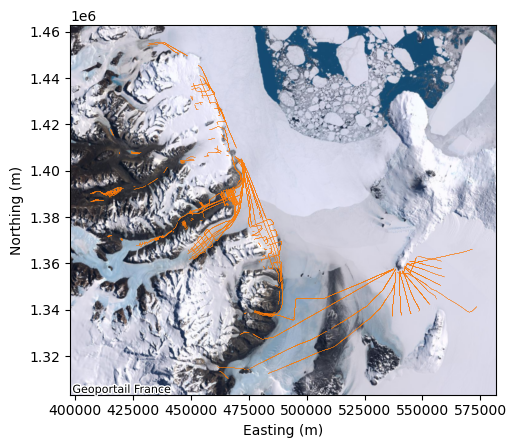

In [182]:
fig, ax = plt.subplots(1,1)
plt.scatter(data_file.UTMX, data_file.UTMY, s=0.005, c='tab:orange', edgecolors=None,linewidths=0.25)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)');
ctx.add_basemap(ax, source=ctx.providers.GeoportailFrance.orthos, zoom=8, crs=32758)

In [183]:
# Look at a single station (not all stations have lm/hm data)
line_no = 21415
line_grouping = data_file.groupby('LINE_NO')
line = line_grouping.get_group(line_no)

# get line data and group by low moment (1) and high moment (2)
lm_line = line.groupby('SEGMENT').get_group(1)
hm_line = line.groupby('SEGMENT').get_group(2)

In [184]:
# get low/high moment data
lm_data = lm_line[data_keys]
hm_data = hm_line[data_keys]

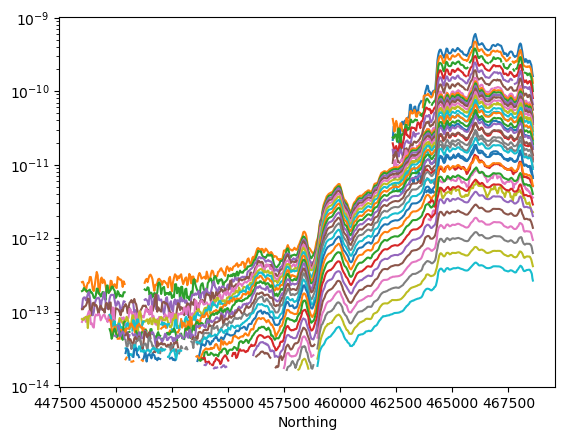

In [185]:
plt.semilogy(lm_line.UTMX, lm_data)
plt.semilogy(hm_line.UTMX, hm_data)
plt.xlabel('Northing');

In [186]:
# select a single sounding along the line, and grab all of the data associated with that station
station_num = 29328
station = line[line.RECORD==station_num]

station_lm = lm_line[lm_line.RECORD==station_num]
station_hm = hm_line[hm_line.RECORD==station_num]

station_lm_data = station_lm[data_keys].values
station_lm_std = station_lm[std_keys].values

station_hm_data = station_hm[data_keys].values
station_hm_std = station_hm[std_keys].values

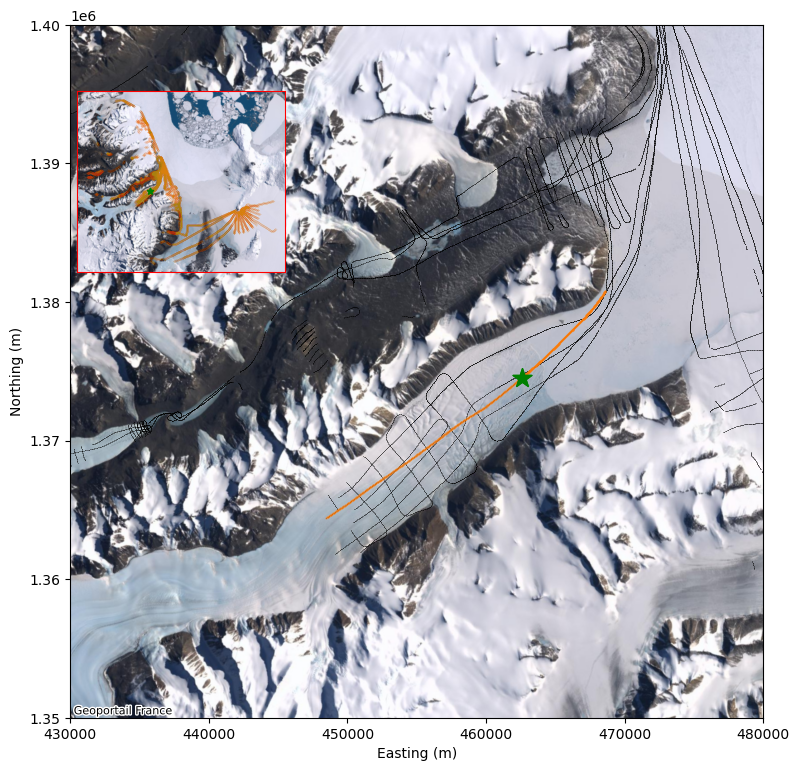

In [187]:
# figure of survey area highlighting the line and sounding
fig, ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter(data_file.UTMX, data_file.UTMY, s=0.05, c='k', edgecolors=None,linewidths=0.25)
plt.scatter(line.UTMX, line.UTMY, s=0.1,c='tab:orange')
plt.scatter(station.UTMX, station.UTMY, s=200, marker='*',c='g')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

ax.set_ylim(1.35e6, 1.4e6)
ax.set_xlim(430000, 480000)
ctx.add_basemap(ax, source=ctx.providers.GeoportailFrance.orthos, zoom=10, crs=32758)

# add thumbnail to corner of plot to show where the data is
thumbnail_ax = inset_axes(ax, width="30%", height=3, loc='upper left')

# set extent of greenland for thumbnail axis in EPSG:3413

thumbnail_ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
for spine in ['bottom', 'top', 'right', 'left']:
    thumbnail_ax.spines[spine].set_color('red')

c = thumbnail_ax.scatter(data_file.UTMX, data_file.UTMY, s=0.0001,c='tab:orange')
thumbnail_ax.scatter(station.UTMX, station.UTMY, s=20, marker='*',c='g')
# set lower resolution background map for zoomed out plot of greenland
ctx.add_basemap(thumbnail_ax,  source=ctx.providers.GeoportailFrance.orthos, zoom=8, crs=32758, attribution=False)

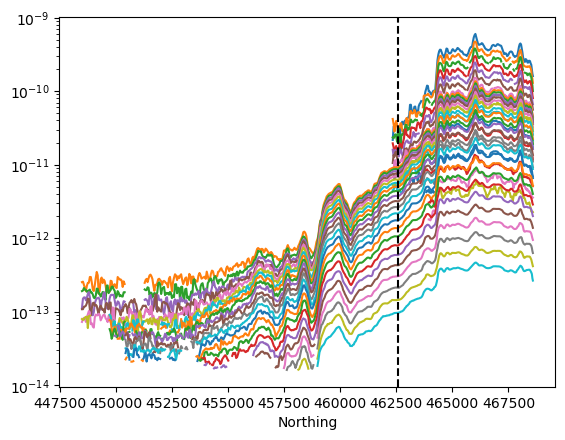

In [192]:
# plot sounding relative to the line
plt.semilogy(lm_line.UTMX, lm_data)
plt.semilogy(hm_line.UTMX, hm_data)
plt.axvline(station.UTMX.iloc[0],c='k',linestyle='--')
plt.xlabel('Northing');

In [193]:
# no geometry file? model waveform?